In [101]:
!pip list

Package                   Version
------------------------- ----------------
ansible-base              2.10.8
anyio                     4.9.0
apache-libcloud           3.2.0
argcomplete               1.8.1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
Automat                   20.2.0
babel                     2.17.0
bcrypt                    3.2.0
beautifulsoup4            4.13.3
bleach                    6.2.0
blinker                   1.4
certifi                   2020.6.20
cffi                      1.17.1
chardet                   4.0.0
charset-normalizer        3.4.1
click                     8.0.3
cloud-init                24.4
colorama                  0.4.4
comm                      0.2.2
command-not-found         0.3
configobj                 5.0.6
constantly                15.1.0
cryptography              3.4.8
dbus-python        

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [83]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=8, h3=8, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)

    return x

In [84]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
#url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [87]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [88]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
my_df

/tmp/ipykernel_50067/2998105502.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [89]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

# Convert these to numpy arrays
X = X.values
y = y.values

y = np.array([int(x) for x in y])

In [90]:
from sklearn.model_selection import train_test_split
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
     
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
     
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
     
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [91]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.128486156463623
Epoch: 10 and loss: 1.046796441078186
Epoch: 20 and loss: 0.8292911648750305
Epoch: 30 and loss: 0.5007739663124084
Epoch: 40 and loss: 0.27408313751220703
Epoch: 50 and loss: 0.11986493319272995
Epoch: 60 and loss: 0.05455829203128815
Epoch: 70 and loss: 0.03560257330536842
Epoch: 80 and loss: 0.027579661458730698
Epoch: 90 and loss: 0.023379601538181305


Text(0.5, 0, 'Epoch')

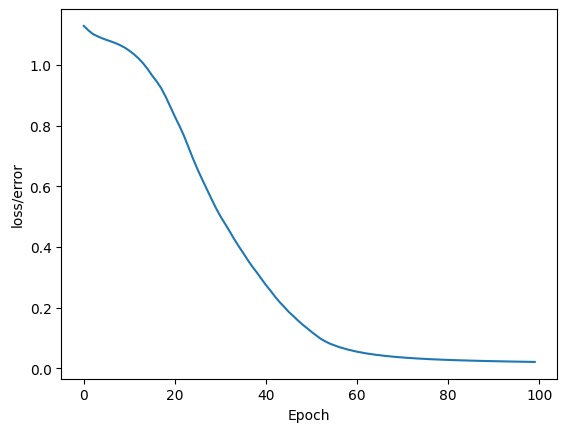

In [92]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [93]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [94]:
loss

tensor(0.1800)

In [95]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_val.argmax().item() == 0:
      v = "Setosa"
    elif y_val.argmax().item() == 1:
      v = 'Versicolor'
    else:
      v = 'Virginica'

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t Actual {y_test[i]} = {x} <=> \t Predicted {y_val.argmax().item()} = {v}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')
     

1.)  tensor([-8.4177,  4.3192,  9.3624]) 	 Actual 2 = Virginica <=> 	 Predicted 2 = Virginica
2.)  tensor([-12.0569,   3.0720,  16.6593]) 	 Actual 2 = Virginica <=> 	 Predicted 2 = Virginica
3.)  tensor([-12.3121,   4.1491,  15.9599]) 	 Actual 2 = Virginica <=> 	 Predicted 2 = Virginica
4.)  tensor([-4.0164,  6.9381, -0.4863]) 	 Actual 1 = Versicolor <=> 	 Predicted 1 = Versicolor
5.)  tensor([-10.2951,   4.4452,  12.3495]) 	 Actual 2 = Virginica <=> 	 Predicted 2 = Virginica
6.)  tensor([-1.3486,  6.8102, -3.7609]) 	 Actual 1 = Versicolor <=> 	 Predicted 1 = Versicolor
7.)  tensor([-7.5898,  5.2927,  7.0237]) 	 Actual 2 = Virginica <=> 	 Predicted 2 = Virginica
8.)  tensor([-3.8012,  7.1034, -0.9575]) 	 Actual 1 = Versicolor <=> 	 Predicted 1 = Versicolor
9.)  tensor([-8.9629,  4.8933,  9.7012]) 	 Actual 2 = Virginica <=> 	 Predicted 2 = Virginica
10.)  tensor([-12.8179,   3.2133,  17.7734]) 	 Actual 2 = Virginica <=> 	 Predicted 2 = Virginica
11.)  tensor([-7.3841,  5.3760,  6.6068])

In [96]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [97]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 11.7097,   1.4850, -17.9921])


In [98]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [99]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-8.8271,  4.4333,  9.9483])


In [100]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [101]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [102]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [103]:
new_iris_1 = torch.tensor([1.1, 2.2, 3.3, 14.4])

In [104]:
with torch.no_grad():
  print(new_model(new_iris_1))

tensor([-18.1282,   3.6970,  25.9642])
